# Lab 5 - Topic Modeling and Named Entity Recognition
## Exercises

___
## Topic Analysis and Unsupervised vs Supervised learning

**1. What is the difference between supervised and unsupervised learning? Discuss some benefits and issues for each approach in the context of topic analysis.**

Unsupervised learning uses no labels, it groups the data into groups that (hopefully) makes sense and creates a structure in the data. Supervised uses labels. It's natural to use unsupervised learning for topic analysis since that can let the algorithm find patterns by itself without imposing our preconceptions of what the algorithm should learn. Also, it's work demanding to label data. Although, using supervised learning could be useful if we'd rather the algorithm to learn the data in the way we want it to. This can make the result more interpretable.

___

**2. You are presented with a large dataset of news articles where only 50% of the data has labeled topics (finance, sports, politics, etc.). You want to assign labels to the remaining data. Explain which approach you would take (no programming!)**

I would do a semi-supervised learning method called self-training. I would start training a model on the labeled portion of the dataset to predict the topics. Then, I'd use this model to predict labels for the unlabeled data, selecting the most confident predictions to add to the training set. Then repeat this process, iteratively improving the model's accuracy on the unlabeled data.

___

**3. Could the previous question be improved by incorporating ideas from semi-supervised learning? Explain.**

Oh, now I already suggested a semi-supervised learning method in that question so, yes! Another  semi-supervised learning approach could be to use unsupervised learning cluster the data in both sets then label the unlabeled data based of the other labeled data in the same cluster.

___

**4. Metrics are essential when dealing with machine learning. However, regarding unsupervised clustering (e.g., of topics), we cannot use the typical precision, recall, and f-measure metrics. What are the alternatives for this task?**

We could for example use:
- **Silhouette Score:** Measures how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- **Calinski-Harabasz Index (Variance Ratio Criterion):** Evaluates the cluster compactness and separation by comparing the variance between clusters with the variance within clusters. Higher scores indicate better-defined clusters.

___

## Topic Modeling

Given the five sentences:

>"Macrosoft announces a new Something Pro laptop with a detachable keyboard."

>"Melon Tusk unveils plans for a new spacecraft that could take humans to Mars."

>"The top-grossing movie of the year Ramvel Retaliators."

>"Geeglo releases a new version of its Cyborg operating system."

>"Fletnix announces a new series from the creators of Thinger Strangs."

**1. How would *you* (without programming) assign the listed sentences to separate topics? Consider techniques we have discussed in the course so far (especially Lab 4)**

Could use Topic Modeling/Keyword Analysis to identify key terms in the sentences and use Semantic Analysis to consider the full sentence.

Topic modelling:
- Announcements, releases, new version, of the year: terms that remind me of news, headlines, advertisement, not literature or novels.
- Laptop, spacecraft, Cyborg, operating system: technology terms.
- Laptop, operating system: computers
- Movie, series: entertainment
- Melon: food.

Semantic analysis:
Using the data from the topic modelling but considering the broader picture.
1. Technology, computers, news
2. Techology, spac, news (ignoring food)
3. Entertainment, news
4. Technology, computers, news
5. Entertainment, news

___

Two well-established algorithms for topic discovery are Latent Semantic Indexing (LSI) and Latent Dirichlet Allocation (LDA)

**2. What preprocessing steps should we consider before implementing these algorithms?**

- Tokenization
- Stop Words Removal
- Lowercasing
- Stemming/Lemmatization
- Punctuation and Special Characters Removal
- Rare Words Removal
- TF-IDF Transformation (optional but useful for LSI)

___

**3. Both LSI and LDA require the user to specify the number of topic clusters. How can we attempt to *automatically* detect a reasonable number of topics?**

We do this by first running LSI and/or LDA then we can run algorithms such as
- Coherent Score Analysis: A score measuring the quality of the topics.
- Topic Stability: splitting the dataset into different split then assesing how stable each topic is to the change.
- Hierarchical Dirichlet Process: an extension of LDA that infers an appropriate number of topics based of the data's structure.

___

## Practical Exercise - Topic Analysis and Modeling of Product Reviews
We will now be using an Amazon product review dataset to perform topic modeling. The dataset specifically contains reviews of "appliances", a subset (~100k reviews, ~50 MB) of the full product review corpus (<https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset> - 55GB!)

This task is somewhat open, and whether you want to just cluster isolated reviews, or within subsets from the review score, is up to you.

**1. Load the dataset with `pandas`, apply some preprocessing steps you find suitable, and use at least five different techniques to visualize the data, based on what you have learned in the course.**
- Hint: look up exploratory data analysis (EDA)

In [50]:
# TODO visualize the reviews in at least five different ways
# must include some of the techniques used in this course.
# this can be plots, graphs, trees, lists, other statistics, ...
import pandas as pd
df = pd.read_csv("amazon_train.csv")
print(df.shape)
df.head()

(72625, 6)


,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body
0,1,1,1,Y,Do not buy this product,I am not a big review writer and truth be told...
1,4,0,0,Y,Wattage is not as advertised.,"Not the advertised 700W. It's actually 1050W,..."
2,1,0,21,Y,don't buy it! $40 to return it. ...,Looks very cheap.... the worse inversion in m...
3,5,0,0,Y,water tastes good.,"Quick shipping, water tastes good."
4,1,8,10,N,Poor quality microwave ruins the product,This unit has the HMB5050 Microwave integrated...


### Nan values

In [51]:
# Find nans in dataset and print these rowx
df[df.isnull().any(axis=1)]

,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body
11836,3,2,3,Y,Three Stars,NaN
30429,3,1,1,Y,NaN,Did not fix problem - my fault.
31256,1,1,1,N,One Star,NaN
60235,5,9,9,Y,Five Stars,NaN
66133,1,10,18,N,Paperweight,NaN


In [52]:
# Drop nan rows
df = df.dropna()

# Find nans in dataset
df.isnull().sum()

star_rating          0
helpful_votes        0
total_votes          0
verified_purchase    0
review_headline      0
review_body          0
dtype: int64

### Statistics

In [53]:
# Statistics for the dataset df
dfLen = df.copy()
dfLen['review_body_length'] = df['review_body'].apply(len)
dfLen['review_headlineLen_length'] = df['review_headline'].apply(len)

dfLen.describe().round(2)


,star_rating,helpful_votes,total_votes,review_body_length,review_headlineLen_length
count,72620.00,72620.00,72620.00,72620.00,72620.00
mean,3.71,4.29,5.15,466.15,25.81
std,1.60,19.75,20.88,801.57,19.18
min,1.00,0.00,0.00,1.00,1.00
25%,2.00,0.00,0.00,108.00,11.00
50%,5.00,1.00,1.00,222.00,20.00
75%,5.00,3.00,4.00,534.25,34.00
max,5.00,1724.00,1761.00,23615.00,128.00


### Histogram of Star Ratings

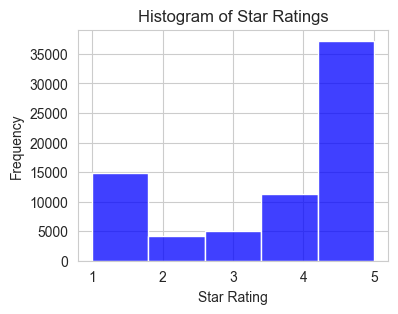

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram for star_rating
plt.figure(figsize=(4, 3))
sns.histplot(df['star_rating'], kde=False, bins=5, color='blue')
plt.title('Histogram of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()


### Dependency Tree

Quick shipping, water tastes good.


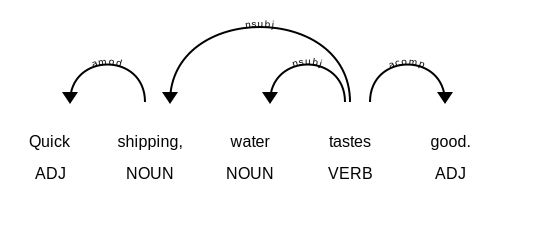

Here we can see the dependency tree of the review making a mistake since the sentence is written in poor english.


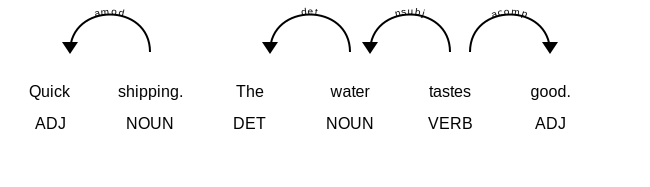

Here, the sentence is manually rewritten and the algorithm does much better.


In [55]:
import spacy
from spacy import displacy
from IPython.display import SVG, display

print(df["review_body"][3])

text = df["review_body"][3]
# TODO: use spacy and displacy to visualize the dependency tree
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Visualizing the dependency tree
displacy_image = displacy.render(doc, style="dep", jupyter=False, options={'distance': 100})
display(SVG(displacy_image))

print("Here we can see the dependency tree of the review making a mistake since the sentence is written in poor english.")

doc = nlp("Quick shipping. The water tastes good.")

displacy_image = displacy.render(doc, style="dep", jupyter=False, options={'distance': 100})
display(SVG(displacy_image))

print("Here, the sentence is manually rewritten and the algorithm does much better.")


___

**2. Before implementing off-the-shelf topic models, it is useful to consider how to process data for topic analysis. Consider what you have learned so far to generate a processing function and discuss your findings. This should only operate on a word level!**

Below is a snippet to fetch some examples from the review corpus. You can use these to test your output.

In [56]:
reviews = df["review_body"].sample(frac=1).tolist()
for review in reviews[:5]:
    print(review)

Fits well and does the job.
After viewing an endless number of Island Range Hoods, we decided to go with this one after my wife contacted the company that distributes them. They were very helpful and courteous, and were able to answer questions to our satisfaction. In the meantime, the price on Amazon dropped $90 and with free shipping, it was a sale.<br /> The installation was not complicated, and the directions were easy to follow. I reinforced between the ceiling joists with angle iron which supported plywood that I laminated together to a thickness of almost 3\\". I mounted the range hood supports with 3\\" lag bolts. I didn't use the Philips head screws that came with the hood. I have trust issues when it comes to suspending 80+ pounds of sheet metal and motor over my head.<br /> The angle iron framework that the hood hangs from is not heavy duty, but appears it will do the job. The screws and nuts (the nuts are brass and affixed to the angle iron) are of poor quality and easily s

In [59]:
# TODO: a preprocessing function to gather words/groups of words/chunks that you consider important for topic analysis/modeling
from typing import List
import spacy
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def preprocess_for_topic(document: str, nlp_model) -> List[str]:
    # Process the document
    doc = nlp_model(document)
    
    # Tokenization, stop word removal, lowercasing, and punctuation/special characters removal
    words = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    
    return words

print(reviews[0])
print(preprocess_for_topic(reviews[0], nlp))

Fits well and does the job.
['fit', 'job']


___
**3. Using the same data, implement a topic model with LDA using the Gensim library. Experiment with different topic counts (e.g., 3) and retrieve the top 5 words from each. Discuss your findings.**

In [ ]:
import logging
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models
import pyLDAvis

# Enable logging for Gensim - Set up logging to see progress
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Preprocess the reviews
processed_reviews = [preprocess_for_topic(review, nlp) for review in reviews]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_reviews)
dictionary.filter_extremes(no_below=10, no_above=0.5)  # Adjust these numbers as needed

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(review) for review in processed_reviews]


In [64]:

# Train the LDA model using LdaMulticore for multiprocessing support
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, workers=10, chunksize=2000)

# Visualization code remains the same
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


2024-03-11 15:13:19,564 : INFO : using symmetric alpha at 0.2
2024-03-11 15:13:19,565 : INFO : using symmetric eta at 0.2
2024-03-11 15:13:19,567 : INFO : using serial LDA version on this node
2024-03-11 15:13:19,578 : INFO : running online LDA training, 5 topics, 10 passes over the supplied corpus of 72620 documents, updating every 20000 documents, evaluating every ~72620 documents, iterating 50x with a convergence threshold of 0.001000
2024-03-11 15:13:19,579 : INFO : training LDA model using 10 processes
2024-03-11 15:13:26,428 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/72620, outstanding queue size 1
2024-03-11 15:13:26,434 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/72620, outstanding queue size 2
2024-03-11 15:13:26,440 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/72620, outstanding queue size 3
2024-03-11 15:13:26,444 : INFO : PROGRESS: pass 0, dispatched chunk #3 = documents up to #8000/72620, outs

___
**4. With the LDA model you trained above, perform topic prediction on a sample from the test dataset, and do a simple empirical evaluation of the results.**

In [65]:
import random
test_df = pd.read_csv("amazon_test.csv")
test_reviews = test_df["review_body"].tolist()

# some reviews are looong. let's filter out some on length.
test_reviews = [review for review in test_reviews if len(str(review).split()) < 30]
test_reviews = random.sample(population=test_reviews, k=10)
test_reviews

['This company is so easy to work with, and did everything possible to make the order right. I have 2 of these pans, easy to clean and look great!',
 'Works great! Lights are bright, fan is noisy but it makes up for it with the suction power. Easy to install.',
 'this hood vent was super easy to install.it looks good and it works fantastic.',
 "HAVSN'T USED THEM ALL, BUT SO FAR, SO GOOD. DEFINATELY A GOOD PRICE, AND APPEAR AS A GOOD PRODUCT.<br />VERY GOOD RESPONSE, RECEIVED IN 2-3 DAYS. THANKS",
 'Perfect fit, no problem installing.',
 'love it!!!!',
 'This product is not very good but work well after my husband uses extra glue to glue the magnet strip together, the magnet strip needs to be stronger.',
 "Don't waste your money.  This cooler DIED after warranty.  Simply stopped working!!!!!!!!!!!",
 'Great item for the price, exactly what I was looking for.  Came on time and directions were easy to follow.  I strongly recommend it if you are upgrading.',
 'Light weight but god for mark

In [66]:
# TODO: predict topics.
# input: 10 random samples from `amazon_test.csv`
# output: print the review, predicted topic, which words are contained within the predicted topic, along with the confidence score.

for review in test_reviews:
    print(review)
    words = preprocess_for_topic(review, nlp)
    print(words)
    bow = dictionary.doc2bow(words)
    print(lda_model.get_document_topics(bow))
    print()

This company is so easy to work with, and did everything possible to make the order right. I have 2 of these pans, easy to clean and look great!
['company', 'easy', 'work', 'possible', 'order', 'right', 'pan', 'easy', 'clean', 'look', 'great']
[(0, 0.50568223), (1, 0.017379388), (2, 0.016975401), (3, 0.017169785), (4, 0.44279313)]

Works great! Lights are bright, fan is noisy but it makes up for it with the suction power. Easy to install.
['work', 'great', 'light', 'bright', 'fan', 'noisy', 'make', 'suction', 'power', 'easy', 'install']
[(0, 0.017271178), (1, 0.01679808), (2, 0.01682351), (3, 0.93228984), (4, 0.016817354)]

this hood vent was super easy to install.it looks good and it works fantastic.
['hood', 'vent', 'super', 'easy', 'look', 'good', 'work', 'fantastic']
[(0, 0.022838011), (1, 0.022342024), (2, 0.022488657), (3, 0.9098241), (4, 0.022507215)]

HAVSN'T USED THEM ALL, BUT SO FAR, SO GOOD. DEFINATELY A GOOD PRICE, AND APPEAR AS A GOOD PRODUCT.<br />VERY GOOD RESPONSE, RECE

___

# Named Entity Recognition

Previously, you learned about noun phrases. Noun phrases such as "The slow white fox", a person "Name Nameson", a place "Mount Doom" or company names "NTNU", are some examples of what we consider *named entities*.


**1. Can you think of named entity categories that are *not* noun phrases?**

Dates (e.g., "March 10, 2024") and monetary values (e.g., "$100") can be examples of named entity categories that aren't structured as noun phrases.

___

Disambiguating (or entity linking) named entities is a crucial task to applications of NER and considers the problem of assigning an identifier to each entity, i.e., linking relevant entities together. The disambiguation process often incorporates external knowledge (knowledge bases).


Consider the sentences:

- "I ate an apple in New York"
- "New York Times wrote an article about Apple"
- "New York is also known as the Big Apple"

**2. How would you tackle the task of distinguishing the entities found here? Describe your approach either in text or by code.**

In [10]:
# your answer here

___

**3. Load the reviews dataset, and extract named entities and their category from 100 reviews. Visualize the named entity categories and their frequencies.**

- For visualization, you can use tables or plots (e.g. `matplotlib` or `seaborn`)

In [11]:
# TODO: group entity categories and visualize by frequency.